In [1]:
!pip3 install opencv-python numpy matplotlib tensorflow pycocotools


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import os
import cv2
import json
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt



In [3]:
DATASET_DIR = "/Users/vineetkumar/Desktop/Gen ai jovac/Taco/data"

ANNOTATIONS_FILE = f"{DATASET_DIR}/annotations.json"
IMAGES_DIR = DATASET_DIR   # images inside batch folders
OUTPUT_DIR = "./taco_classes"
IMG_SIZE = 224
print("Dataset folder:", DATASET_DIR)
print("Annotations exists:", os.path.exists(ANNOTATIONS_FILE))


Dataset folder: /Users/vineetkumar/Desktop/Gen ai jovac/Taco/data
Annotations exists: True


In [4]:
print("DATASET_DIR exists:", os.path.exists(DATASET_DIR))
print("ANNOTATIONS JSON exists:", os.path.exists(ANNOTATIONS_FILE))

# List batch folders
print("Batch folders:", [f for f in os.listdir(DATASET_DIR) if f.startswith("batch")])


DATASET_DIR exists: True
ANNOTATIONS JSON exists: True
Batch folders: ['batch_14', 'batch_13', 'batch_1', 'batch_6', 'batch_8', 'batch_12', 'batch_15', 'batch_9', 'batch_7', 'batch_5', 'batch_2', 'batch_10', 'batch_3', 'batch_4', 'batch_11']


In [5]:
print("Images folder exists:", os.path.exists(IMAGES_DIR))
print("Annotations JSON exists:", os.path.exists(ANNOTATIONS_FILE))


Images folder exists: True
Annotations JSON exists: True


In [6]:
with open(ANNOTATIONS_FILE, "r") as f:
    data = json.load(f)

categories = {cat['id']: cat['name'] for cat in data['categories']}
print("Categories:", categories)


Categories: {0: 'Aluminium foil', 1: 'Battery', 2: 'Aluminium blister pack', 3: 'Carded blister pack', 4: 'Other plastic bottle', 5: 'Clear plastic bottle', 6: 'Glass bottle', 7: 'Plastic bottle cap', 8: 'Metal bottle cap', 9: 'Broken glass', 10: 'Food Can', 11: 'Aerosol', 12: 'Drink can', 13: 'Toilet tube', 14: 'Other carton', 15: 'Egg carton', 16: 'Drink carton', 17: 'Corrugated carton', 18: 'Meal carton', 19: 'Pizza box', 20: 'Paper cup', 21: 'Disposable plastic cup', 22: 'Foam cup', 23: 'Glass cup', 24: 'Other plastic cup', 25: 'Food waste', 26: 'Glass jar', 27: 'Plastic lid', 28: 'Metal lid', 29: 'Other plastic', 30: 'Magazine paper', 31: 'Tissues', 32: 'Wrapping paper', 33: 'Normal paper', 34: 'Paper bag', 35: 'Plastified paper bag', 36: 'Plastic film', 37: 'Six pack rings', 38: 'Garbage bag', 39: 'Other plastic wrapper', 40: 'Single-use carrier bag', 41: 'Polypropylene bag', 42: 'Crisp packet', 43: 'Spread tub', 44: 'Tupperware', 45: 'Disposable food container', 46: 'Foam food c

In [7]:
os.makedirs(OUTPUT_DIR, exist_ok=True)

for cat in categories.values():
    os.makedirs(f"{OUTPUT_DIR}/{cat}", exist_ok=True)

print("Created:", OUTPUT_DIR)


Created: ./taco_classes


In [8]:
def find_image_path(file_name):
    # Search the file inside all batch folders
    for folder in os.listdir(IMAGES_DIR):
        folder_path = os.path.join(IMAGES_DIR, folder)
        if os.path.isdir(folder_path):
            possible = os.path.join(folder_path, file_name)
            if os.path.exists(possible):
                return possible
    return None


count = 0

for ann in data["annotations"]:
    cat_id = ann["category_id"]
    category = categories[cat_id]

    img_id = ann["image_id"]
    image_info = next(img for img in data["images"] if img["id"] == img_id)

    # CLEAN THE FILE NAME (remove batch_1/, batch_2/, etc.)
    raw_name = image_info["file_name"]
    file_name = raw_name.split("/")[-1]   # keep only "000006.jpg" part

    # Find actual path
    img_path = find_image_path(file_name)
    if img_path is None:
        print("Image not found:", file_name)
        continue

    img = cv2.imread(img_path)
    if img is None:
        continue

    x, y, w, h = map(int, ann["bbox"])
    crop = img[y:y+h, x:x+w]

    if crop.size == 0:
        continue

    crop = cv2.resize(crop, (IMG_SIZE, IMG_SIZE))

    save_path = f"{OUTPUT_DIR}/{category}/{ann['id']}.jpg"
    cv2.imwrite(save_path, crop)
    count += 1

print("Total cropped objects:", count)


Total cropped objects: 4599


In [9]:
def load_images(folder_path):
    X, y = [], []
    label_map = {}
    label_id = 0

    for folder in os.listdir(folder_path):
        folder_full = os.path.join(folder_path, folder)

        if not os.path.isdir(folder_full):
            continue

        label_map[label_id] = folder

        for file in os.listdir(folder_full):
            img_path = os.path.join(folder_full, file)
            img = cv2.imread(img_path)
            if img is None:
                continue

            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(img)
            y.append(label_id)

        label_id += 1

    return np.array(X), np.array(y), label_map


X, y, label_map = load_images(OUTPUT_DIR)
print("Classes:", label_map)
print("Total images:", len(X))


Classes: {0: 'Paper cup', 1: 'Glass bottle', 2: 'Aluminium foil', 3: 'Normal paper', 4: 'Egg carton', 5: 'Other plastic bottle', 6: 'Squeezable tube', 7: 'Metal bottle cap', 8: 'Aerosol', 9: 'Drink can', 10: 'Tupperware', 11: 'Wrapping paper', 12: 'Shoe', 13: 'Other plastic cup', 14: 'Rope & strings', 15: 'Corrugated carton', 16: 'Food waste', 17: 'Single-use carrier bag', 18: 'Aluminium blister pack', 19: 'Scrap metal', 20: 'Plastified paper bag', 21: 'Plastic glooves', 22: 'Polypropylene bag', 23: 'Foam food container', 24: 'Garbage bag', 25: 'Broken glass', 26: 'Foam cup', 27: 'Spread tub', 28: 'Other plastic container', 29: 'Carded blister pack', 30: 'Clear plastic bottle', 31: 'Plastic film', 32: 'Other plastic', 33: 'Disposable plastic cup', 34: 'Crisp packet', 35: 'Food Can', 36: 'Glass jar', 37: 'Metal lid', 38: 'Other plastic wrapper', 39: 'Six pack rings', 40: 'Plastic bottle cap', 41: 'Tissues', 42: 'Plastic lid', 43: 'Drink carton', 44: 'Pizza box', 45: 'Other carton', 46: 

In [10]:
X = X.astype("float32") / 255.0
y = tf.keras.utils.to_categorical(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (4599, 224, 224, 3)
y shape: (4599, 60)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)



Train shape: (3679, 224, 224, 3)
Validation shape: (920, 224, 224, 3)


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(y_train.shape[1], activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


/Users/vineetkumar/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 60)             │         7,740 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,915,132 (91.23 MB)

 Trainable params: 23,915,132 (91.23 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_val, y_val)
)


Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.0826 - loss: 6.1836 - val_accuracy: 0.1467 - val_loss: 3.3294
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.1475 - loss: 3.2718 - val_accuracy: 0.1859 - val_loss: 3.2180
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.1837 - loss: 3.1295 - val_accuracy: 0.1717 - val_loss: 3.1705
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.2272 - loss: 2.9060 - val_accuracy: 0.1815 - val_loss: 3.2490
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.3543 - loss: 2.4270 - val_accuracy: 0.1217 - val_loss: 3.5092
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.4906 - loss: 1.8722 - val_accuracy: 0.1685 - val_loss: 4.3577
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.6234 - loss: 1.4284 - val_accuracy: 0.1511 - val_loss: 5.3560
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.7163 - loss: 1.1090 - val_accu

In [16]:
model.save("taco_cnn_basic.keras")
print("Model saved successfully!")


Model saved successfully!


In [17]:
import json

with open("label_map_basic.json", "w") as f:
    json.dump(label_map, f)

print("Label map saved!")


Label map saved!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


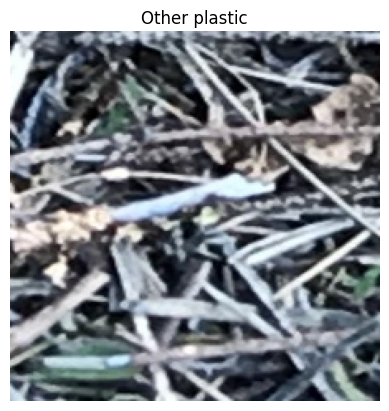

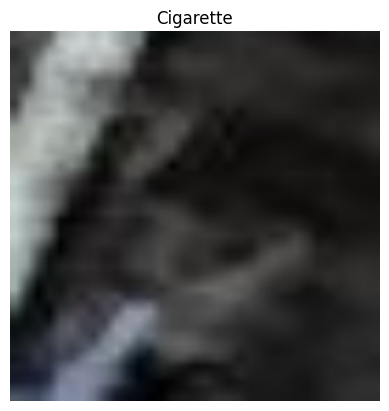

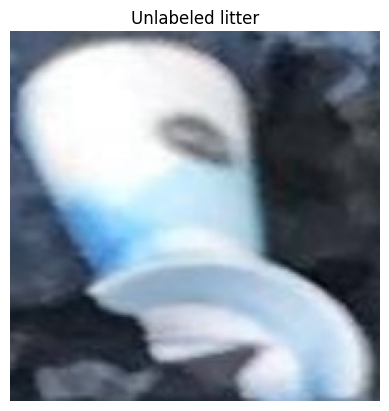

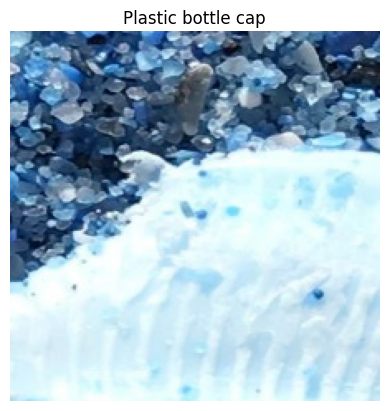

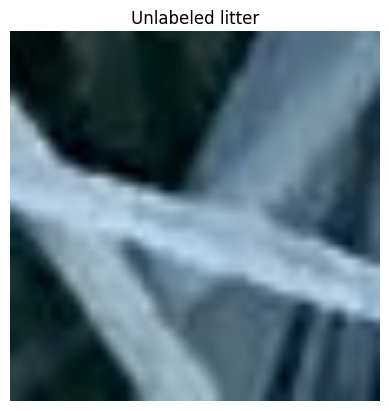

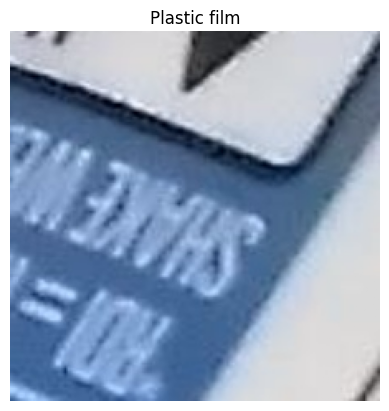

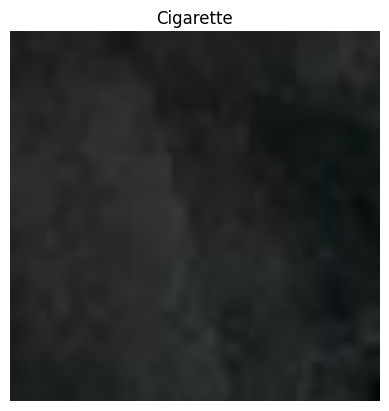

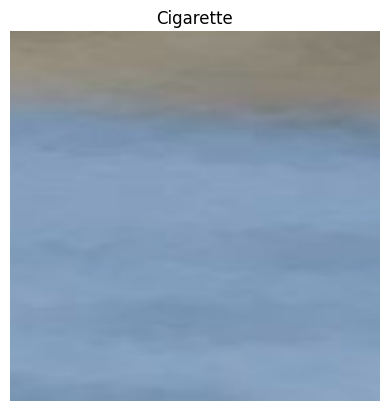

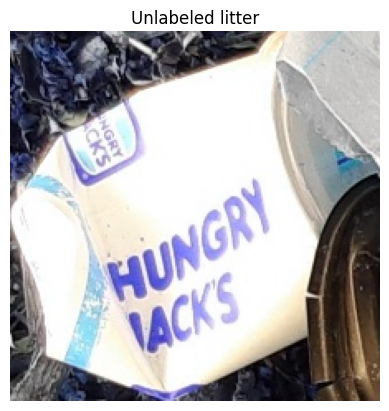

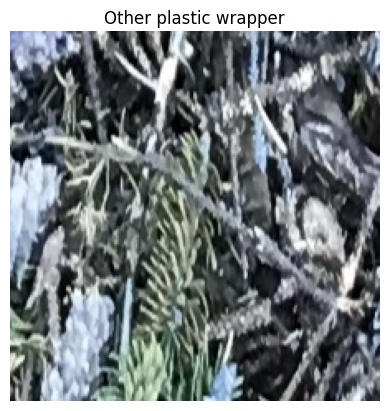

In [14]:
pred = model.predict(X_val[:10])

for i in range(10):
    plt.imshow(X_val[i])
    plt.title(list(label_map.values())[np.argmax(pred[i])])
    plt.axis('off')
    plt.show()
